In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets
%matplotlib inline


In [35]:
boston = datasets.load_boston()
data = pd.DataFrame(boston.data,columns=boston.feature_names)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [36]:
data['PRICE']=boston.target
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


<AxesSubplot:>

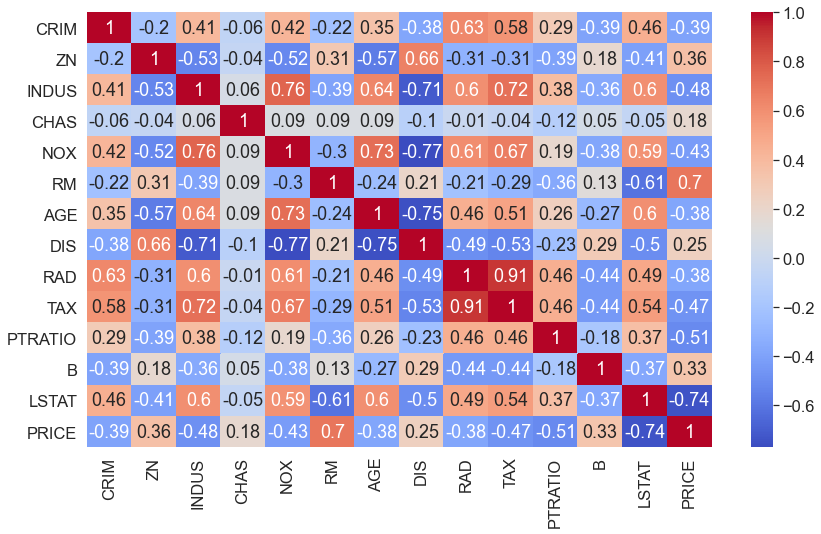

In [38]:
# Plot the correlation heatmap
plt.figure(figsize=(14, 8))
corr_matrix = data.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)


Text(0, 0.5, 'PRICE')

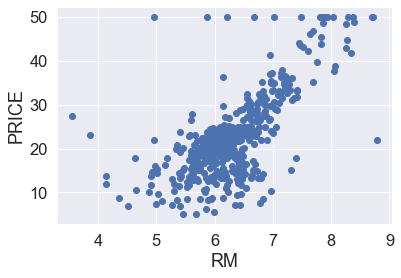

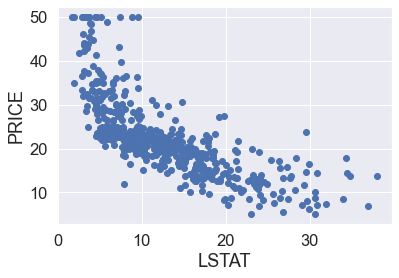

In [39]:
#Scatter plot to observe the correlations between the features that are highly correlated with PRICE

y = data['PRICE']

plot1 = plt.figure(1)
plt.scatter(data['RM'],y)
plt.xlabel('RM')
plt.ylabel('PRICE')

plot2 = plt.figure(2)
plt.scatter(data['LSTAT'],y)
plt.xlabel('LSTAT')
plt.ylabel('PRICE')


In [40]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [42]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, Y_train)

RandomForestRegressor()

In [59]:
# # Determining the important features
# def feat_importance(reg,data):
#     importance = reg.feature_importances_
#     importance = pd.DataFrame(importance,index=data.columns,columns=["Importance"])
#     return importance.sort_values(by=['Importance'],ascending=False)
# importance = feat_importance(reg,X_train)
# importance[:]

In [60]:
# importance.plot(kind='barh')

In [43]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [46]:
import sklearn.metrics as metrics
print('R^2:',metrics.r2_score(Y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_train, y_pred))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, y_pred)))

R^2: 0.9802391264926229
Adjusted R^2: 0.9794835636820467
MAE: 0.8194915254237283
MSE: 1.5648612203389833
RMSE: 1.2509441315818157


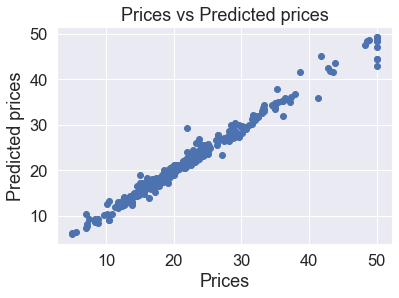

In [44]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(Y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

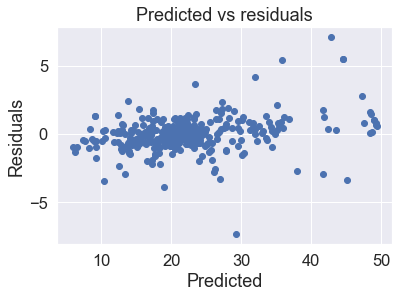

In [47]:
# Checking residuals
plt.scatter(y_pred,Y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [48]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [52]:
# Model Evaluation
acc_rf = metrics.r2_score(Y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(Y_test, y_test_pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))

R^2: 0.8922638617676464
Adjusted R^2: 0.8821148052674972
MAE: 2.370625000000001
MSE: 10.405839467105269
RMSE: 3.2258083432072135


In [54]:
models = pd.DataFrame({'Model': ['Random Forest'],
    'R-squared Score': [acc_rf*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
0,Random Forest,89.226386
